# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno:**  Pedro Victor Xavier Moreira
### **Matrícula** 2018079829


### **Tema:** Identificação de padrões frequentes em cestas de compras
### **Base de dados:** (link) https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset

### **Link  Colab:**  https://colab.research.google.com/drive/1CG4KRhQ_EIl0-q2p98zAJ5KHaspIPSH0?usp=sharing


### Contexto

Supermercados e varejistas são modelos de negócios tradicionais. Nesse sentido, o
mercado é extremamente concorrido e qualquer vantagem competitiva que possa reter,
atrair e aumentar o ticket médio do cliente é bem vindo.
O objetivo do supermercado em questão é maximizar seu lucro. Por conseguinte, atrair e
entender o comportamento do cliente é fundamental.

O sucesso do negócio se traduz diretamente em vendas. Dessa forma, atrair clientes e
aumentar o ticket médio das vendas pode ser traduzido em sucesso do negócio.

### O Dataset

O conjunto de dados possui 38.765 linhas de pedidos de compras de pessoas dos
supermercados. Essas ordens podem ser analisadas e as regras de associação podem ser
geradas usando o Market Basket Analysis.

Trabalharemos com 3 colunas que descrevem bem o padrão de compra de clientes do supermercado.

Member_name -> ID do comprador

Date -> Data da compra

itemDescription -> Item comprado


### Sucesso do Negócio

O sucesso do projeto se dá ao conseguir entregar pelo menos 10 insights de vendas após a
análise de dados. Dessa forma, principais itens vendidos, principais combinações de
vendas e suas frequências podem ser utilizados para aumentar as vendas.




In [ ]:

%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 6.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
#Bibliotecas usadas no projeto
import pandas as pd
import plotly.express as px
from google.colab import files
import io
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth ,association_rules


##**2. Data understanding (Entendimento dos dados)**


In [ ]:
#Carregando a base de dados
url = 'https://raw.githubusercontent.com/pedrovxm/Groceries_dataset/main/Groceries_dataset.csv'
df = pd.read_csv(url)
df


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [ ]:
# Transformando data
df['Date'] = pd.to_datetime(df['Date'])

[Text(0, 0.5, 'Number of Items Sold'), Text(0.5, 0, 'Date')]

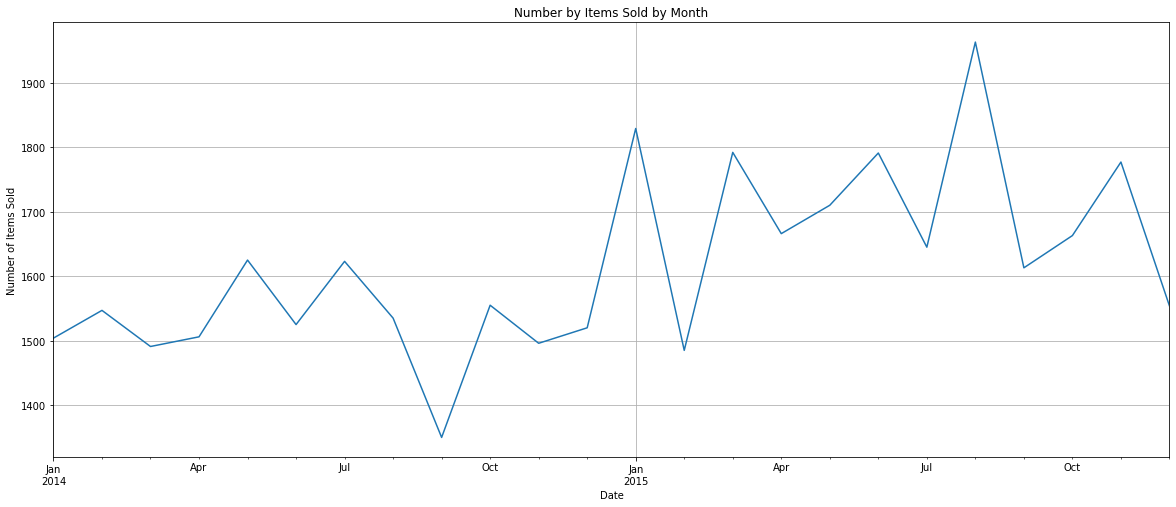

In [ ]:
# Distribuição de vendas ao longo do período
df_date=df.set_index(['Date'])
df_date.resample("M")['itemDescription'].count().plot(figsize = (20,8), grid = True, title = "Number by Items Sold by Month").set(xlabel = "Date", ylabel = "Number of Items Sold")

In [ ]:
# Checando Null e Zeros
df.isnull().sum().sort_values(ascending=False) 

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
# Contagem de clientes únicos
df['Member_number'].nunique()

3898

In [ ]:
# Contagem de itens únicos
df['itemDescription'].nunique()


167

In [ ]:
# Contagem de qtd de items comprados ao longo das transações
f = pd.DataFrame(df['itemDescription'])
f = f.groupby('itemDescription')['itemDescription'].count()

a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
item




,Count,Item
164,2502,whole milk
102,1898,other vegetables
122,1716,rolls/buns
138,1514,soda
165,1334,yogurt
123,1071,root vegetables
156,1032,tropical fruit
12,933,bottled water
130,924,sausage
30,812,citrus fruit


In [ ]:
# Distribuição de items por qtd.
fig = px.treemap(item, path=['Item'], values='Count')
fig.show()

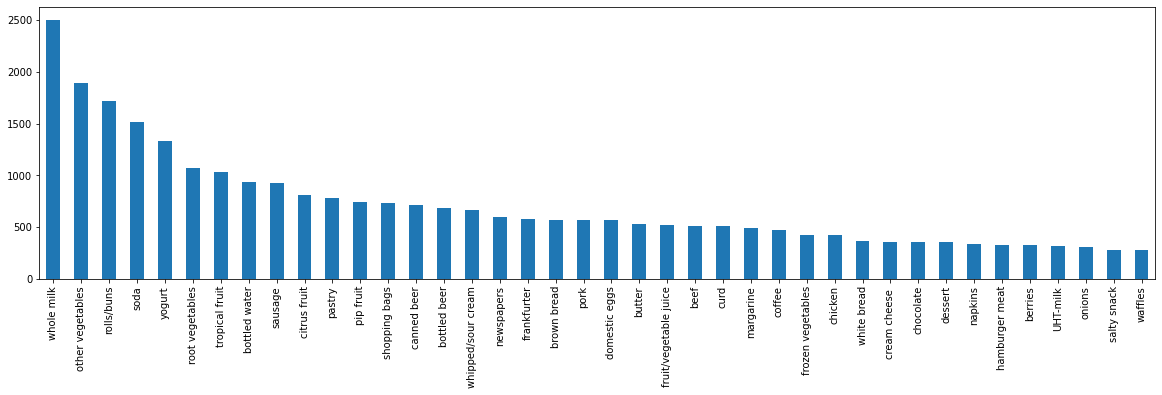

In [ ]:
# Amostragem dos 40 itens mais presentes nas compras
ax = df['itemDescription'].value_counts().nlargest(40).plot(kind = 'bar',figsize=(20,5))

##**3. Data preparation (Preparação dos dados)**

In [ ]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False) ## Selecting only required variables for modelling
cust_level['itemDescription'] = cust_level['itemDescription'].str.strip() # Removing white spaces if any
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [ ]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(['Member_number']))] ## Combing all the items in list format for each cutomer

In [ ]:
# Mapeamento de items para cada transação
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
#te.columns_

In [ ]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()

In [ ]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


##**4. Modeling (Modelagem)**

A modelagem consiste basicamente na aplicação do FP Growth para a identificação de padrões frequentes nas diversas transações previamentes identificadas



In [ ]:
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))
freq_items

NameError: ignored

In [ ]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.001)
rules

##**5. Interpretação dos Resultados**

A tabela **rules** nos revela as combinações de itens que possuem suporte maior que 0.1, ou seja, 10%. Nesse sentido, a frequeência de ocorrência desses itens juntos em uma transação é no mínimo de 10%.


Utilizando-se apenas da métrica de suporte, conseguimos ter ideia da freqûencia de consumo do comprador e rearranjar estratégias de marketing e posicionamento para qualquer uma das 25 opções listadas na tabela. Dessa forma, promover algum item dos pares em valores promocionais podem gerar aumento da venda, em média esse aumento pode ser dado pela confiança, do outro item do par.

Utilizando-se da métrica de confiança, podemos gerar uma estratégia de marketing pessoal. Dado que um primeiro item foi comprado, qual a probabilidade de o segundo também ser de interesse deste consumidor? A confiança nos revela essa informação. A utilização da mesma pode ser utilizada como fator de aumento no ticket médio do comprador.
